<a href="https://colab.research.google.com/github/santhananarayanan07/Codsoft_intern_projects/blob/main/Customer_churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

In [3]:
df = pd.read_csv("Churn_Modelling.csv")
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
x = df.drop('Exited',axis = 1)
print(x)

      RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMemb

In [5]:
y = df['Exited']
print(y)

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64


In [6]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [7]:
categorical_cols = x_train.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    x_train[col] = le.fit_transform(x_train[col])
    label_encoders[col] = le

In [8]:
model_dt = DecisionTreeClassifier(criterion = 'gini', random_state=100, max_depth=6, min_samples_leaf=8)

In [9]:
model_dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [10]:
for col in categorical_cols:
    le = label_encoders[col]
    x_test[col] = x_test[col].map(lambda s: '<unknown>' if s not in le.classes_ else s)
    le.classes_ = np.append(le.classes_, '<unknown>')
    x_test[col] = le.transform(x_test[col])

In [11]:
y_pred = model_dt.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [12]:
model_dt.score(x_test,y_pred)

1.0

In [13]:
print(classification_report(y_test,y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1575
           1       0.80      0.41      0.54       425

    accuracy                           0.85      2000
   macro avg       0.83      0.69      0.73      2000
weighted avg       0.85      0.85      0.83      2000



In [14]:
print(confusion_matrix(y_test,y_pred))

[[1531   44]
 [ 252  173]]


In [15]:
x_encoded = x.copy()

for col in x_encoded.columns:
    if x_encoded[col].dtype == 'object':
        le = LabelEncoder()
        x_encoded[col] = le.fit_transform(x_encoded[col])

sm = SMOTEENN()
x_resampled, y_resampled = sm.fit_resample(x_encoded, y)

In [16]:
xr_train,xr_test,yr_train,yr_test = train_test_split(x_resampled,y_resampled,test_size = 0.2)


In [18]:
model_dt_smote = DecisionTreeClassifier(criterion = 'gini', random_state = 100, max_depth = 6, min_samples_leaf=8)

In [19]:
model_dt_smote.fit(xr_train,yr_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [20]:
y_pred_smote = model_dt_smote.predict(xr_test)
y_pred_smote

array([0, 1, 0, ..., 1, 1, 0])

In [21]:
print(classification_report(yr_test,y_pred_smote, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.80      0.73      0.76       642
           1       0.84      0.89      0.86      1029

    accuracy                           0.83      1671
   macro avg       0.82      0.81      0.81      1671
weighted avg       0.83      0.83      0.83      1671



In [22]:
print(confusion_matrix(yr_test,y_pred_smote))

[[466 176]
 [113 916]]


In [23]:
model_rf = RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100, max_depth = 6, min_samples_leaf=8)
model_rf.fit(x_train,y_train)
y_pred_rf = model_rf.predict(x_test)

In [24]:
print(classification_report(yr_test, y_pred_smote, labels = [0,1]))

              precision    recall  f1-score   support

           0       0.80      0.73      0.76       642
           1       0.84      0.89      0.86      1029

    accuracy                           0.83      1671
   macro avg       0.82      0.81      0.81      1671
weighted avg       0.83      0.83      0.83      1671



In [28]:
confusion_matrix(yr_test,y_pred_smote)

array([[466, 176],
       [113, 916]])

Text(95.72222222222221, 0.5, 'True value')

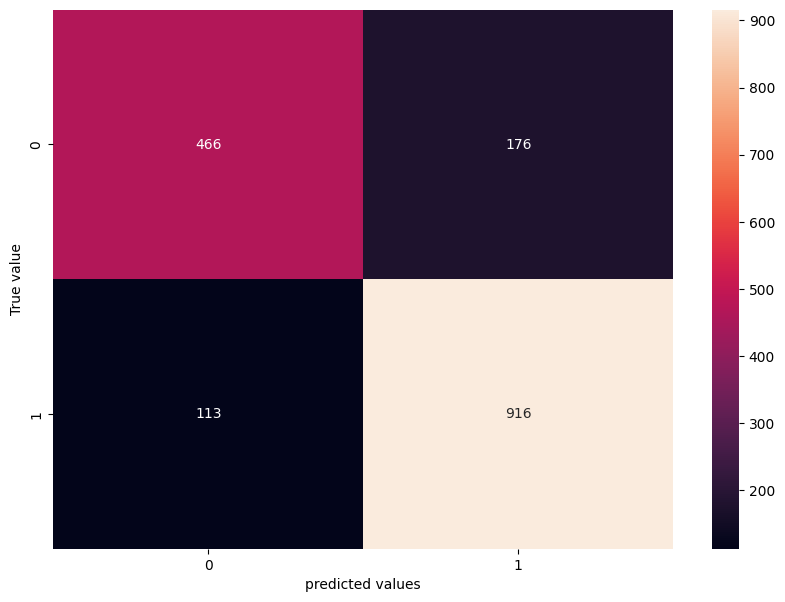

In [31]:
import seaborn as sns
cm = confusion_matrix(yr_test,y_pred_smote)
plt.figure(figsize = (10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predicted values')
plt.ylabel('True value')